In [ ]:
!python -m pip install matplotlib numpy

In [5]:
from sys import float_info

import numpy as np
from numpy.linalg import norm, solve

def ordinary_least_squares(x: np.ndarray, y: np.ndarray, order: int,
        robust: bool = False, delta: float = 1.0, epsilon: float = 1E-7,
        max_iter: int = 100) -> np.ndarray:
    if (not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray)
            or not isinstance(order, int) or not isinstance(robust, bool)
            or not isinstance(delta, float) or not isinstance(epsilon, float)
            or not isinstance(max_iter, int)):
        raise TypeError()
    if (len(x.shape) != 1 or x.shape != y.shape or order < 1
            or delta < float_info.epsilon or epsilon < float_info.epsilon
            or max_iter < 1):
        raise ValueError()

    m = order + 1
    x_upper = np.vander(x, m, increasing=False)
    left, right = x_upper.T @ x_upper, x_upper.T @ y
    beta = solve(left, right)
    if not robust:
        return beta

    for _ in range(max_iter):
        x_upper_beta = x_upper @ beta
        diff = x_upper_beta - y
        cond = np.abs(diff) < delta
        y = np.where(cond, y, x_upper_beta - np.sign(diff) * delta)
        right = x_upper.T @ y
        next_beta = solve(left, right)
        error = norm(next_beta - beta, ord=2)
        beta, next_beta = next_beta, beta
        if (error < epsilon):
            break
    return beta

In [14]:
def f(x: float) -> float:
    return x**2 / 5.0 - 3.0 * x + 5.0

start, stop = 0.0, 20.0
x = np.linspace(start, stop, 80)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

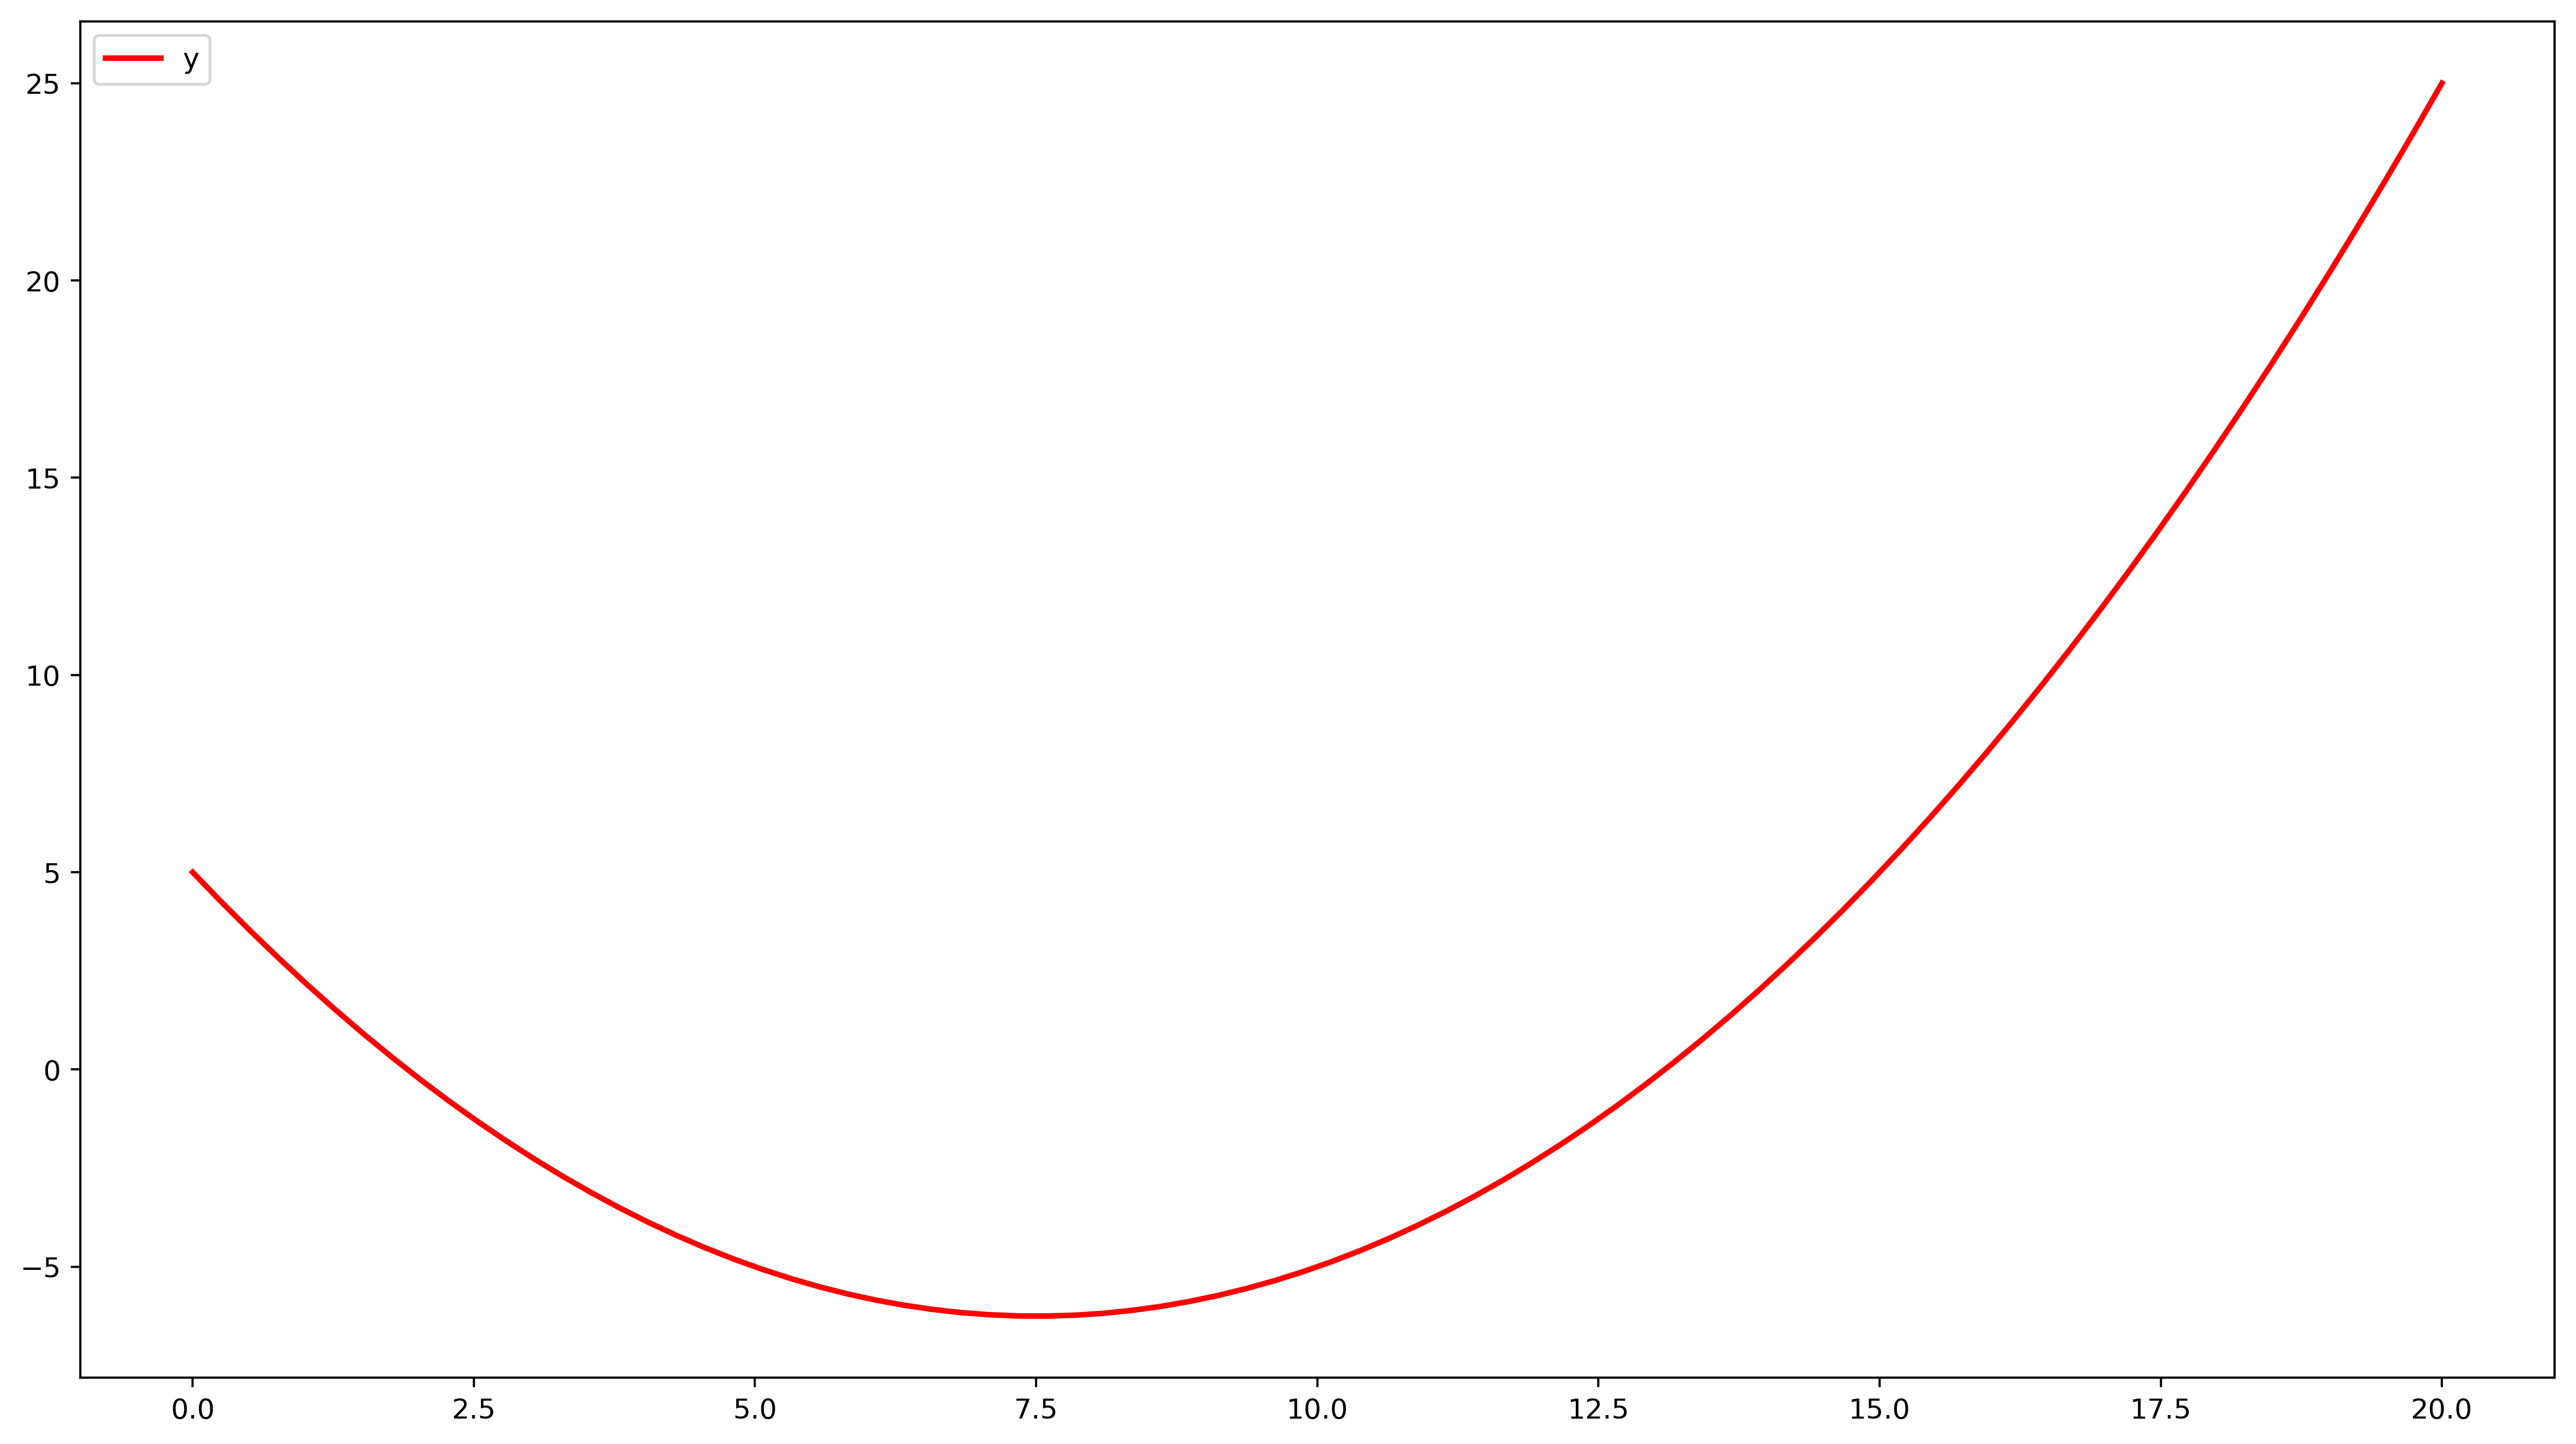

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y, color='red', lw=2, label='y')
plt.legend()
plt.show()

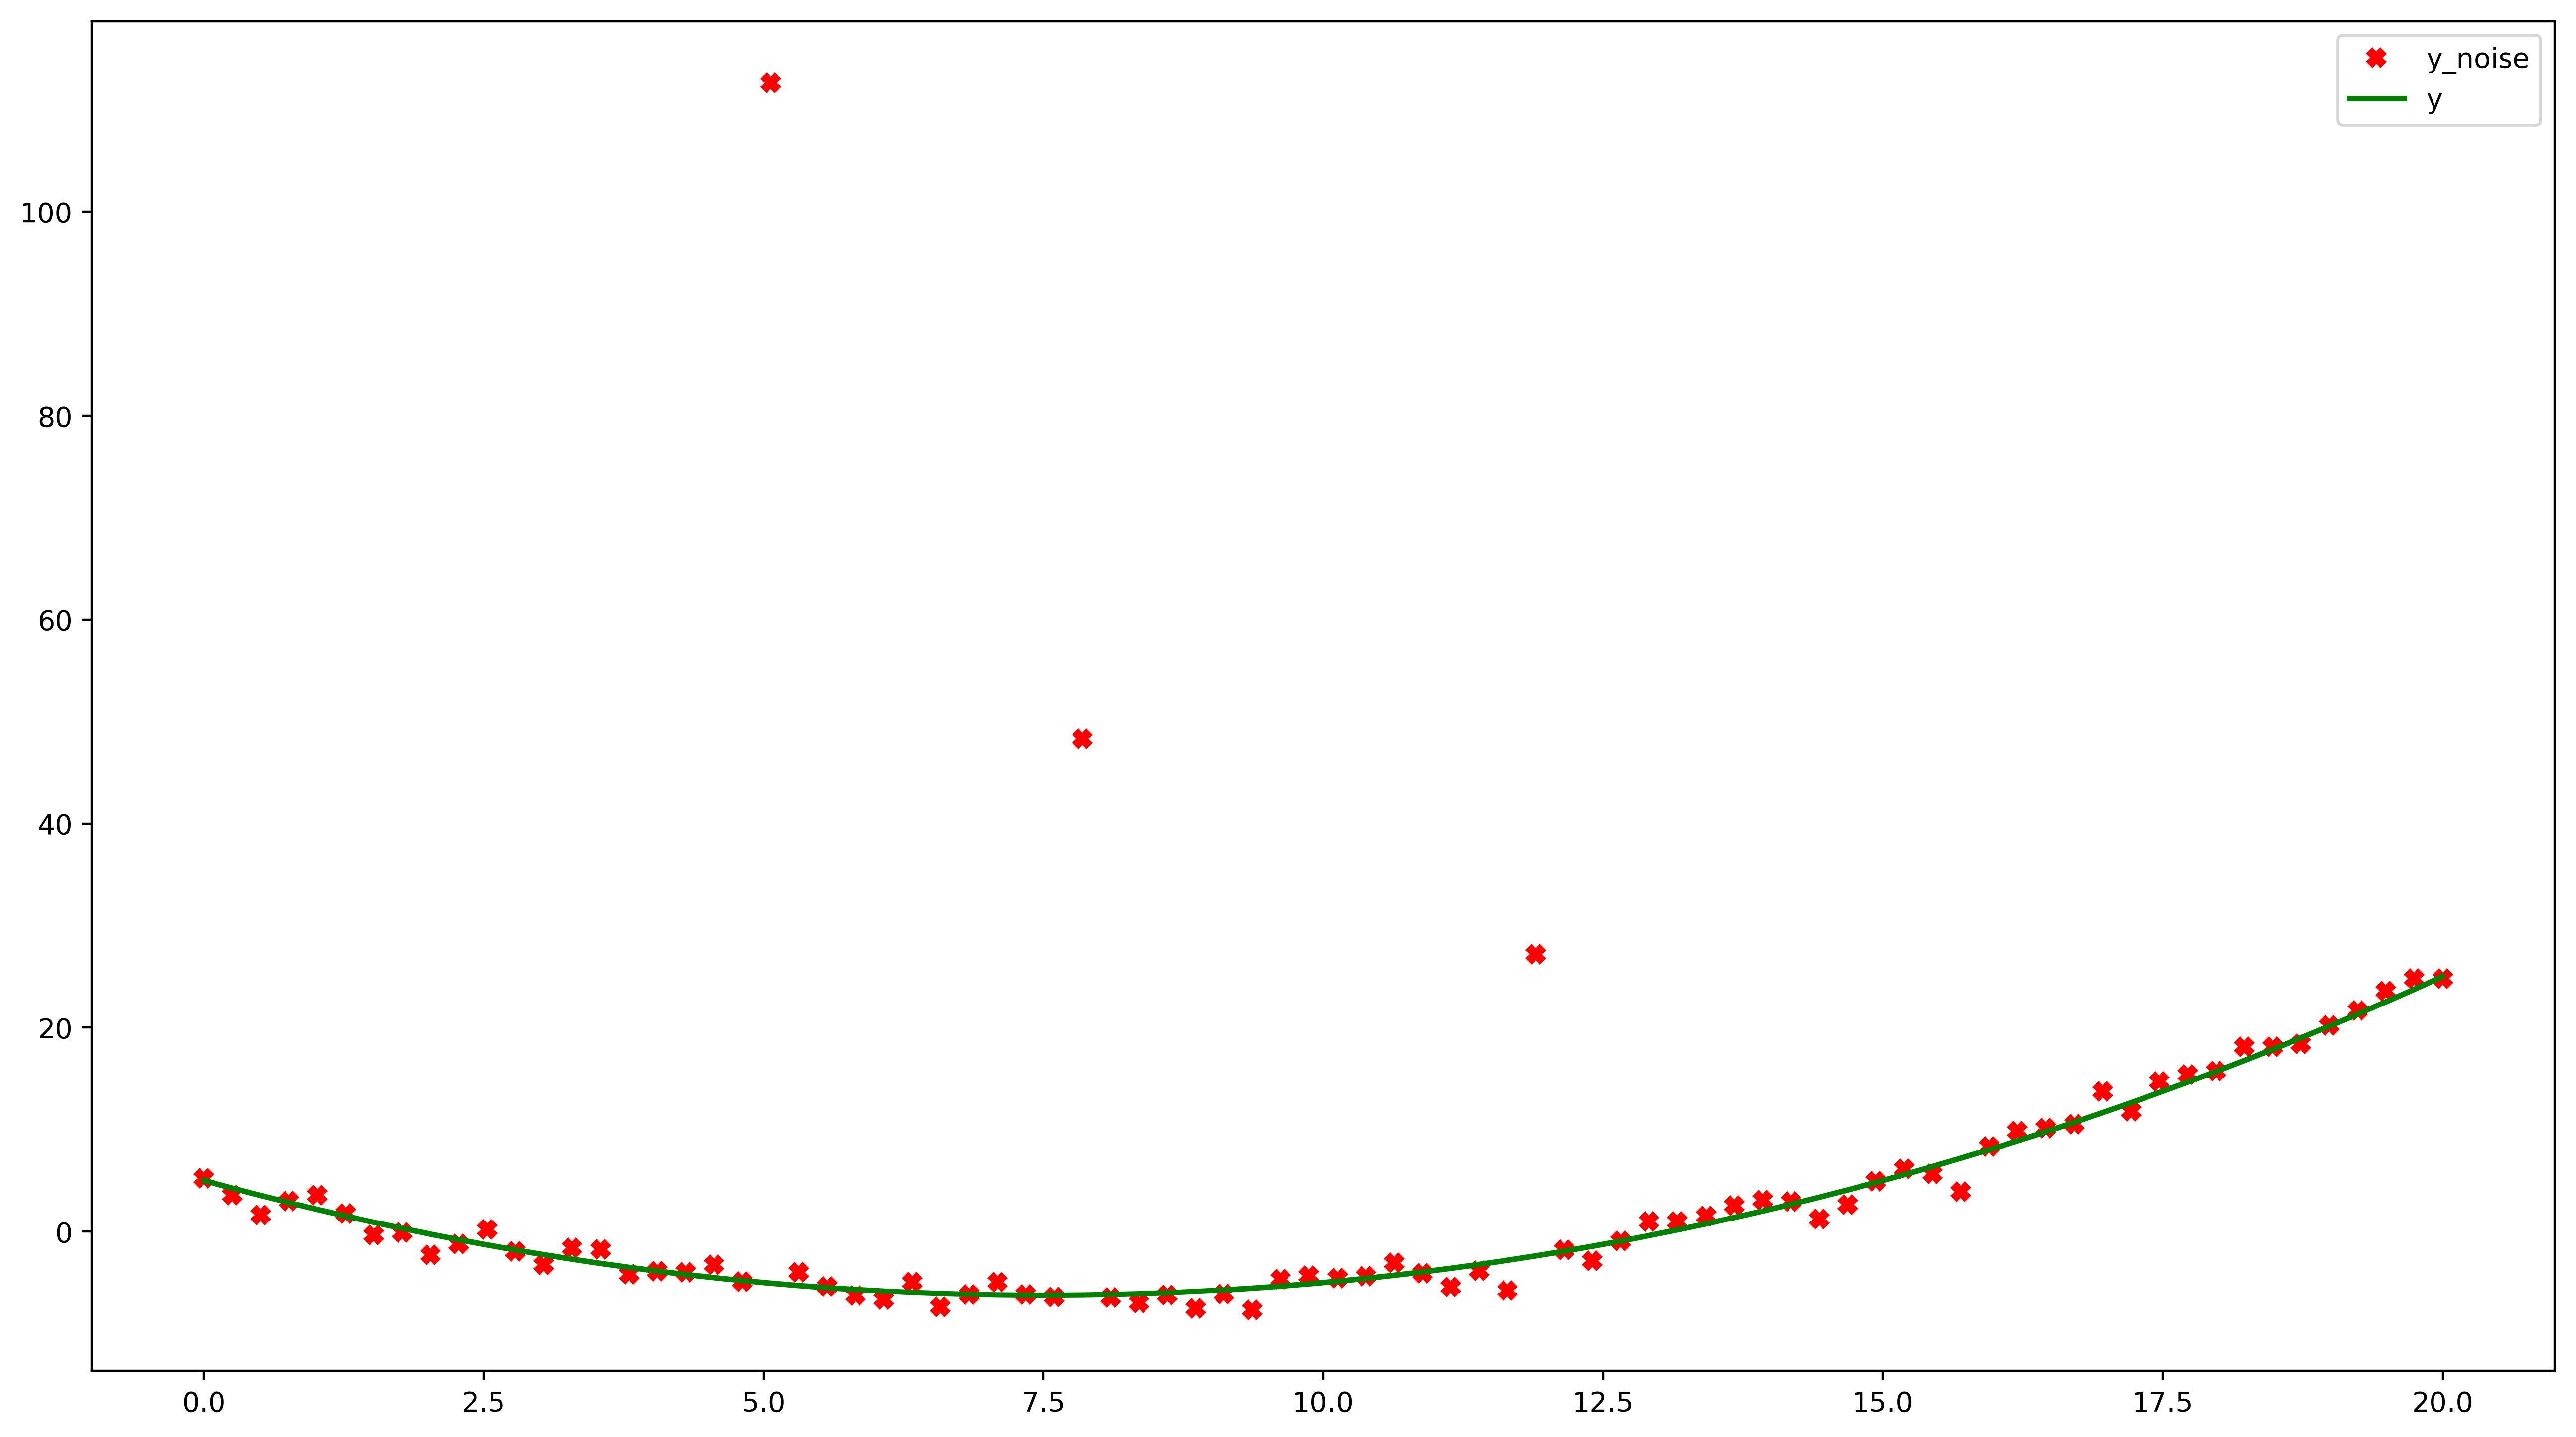

In [50]:
from math import erfc, sqrt
from numpy.random import choice, normal

n = len(x)
p = erfc(sqrt(2))
typical = normal(loc=0.0, scale=1.0, size=n)
outlier = normal(loc=0.0, scale=100.0, size=n)
cond = choice([False, True], size=n, p=[p, 1.0 - p])
np.where(cond, typical, outlier)
y_noise = y + np.where(cond, typical, outlier)
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y_noise, 'Xr', label='y_noise')
subplot.plot(x, y, color='green', lw=2, label='y')
plt.legend()
plt.show()

[ 0.15459549 -2.30735707  6.65226953]


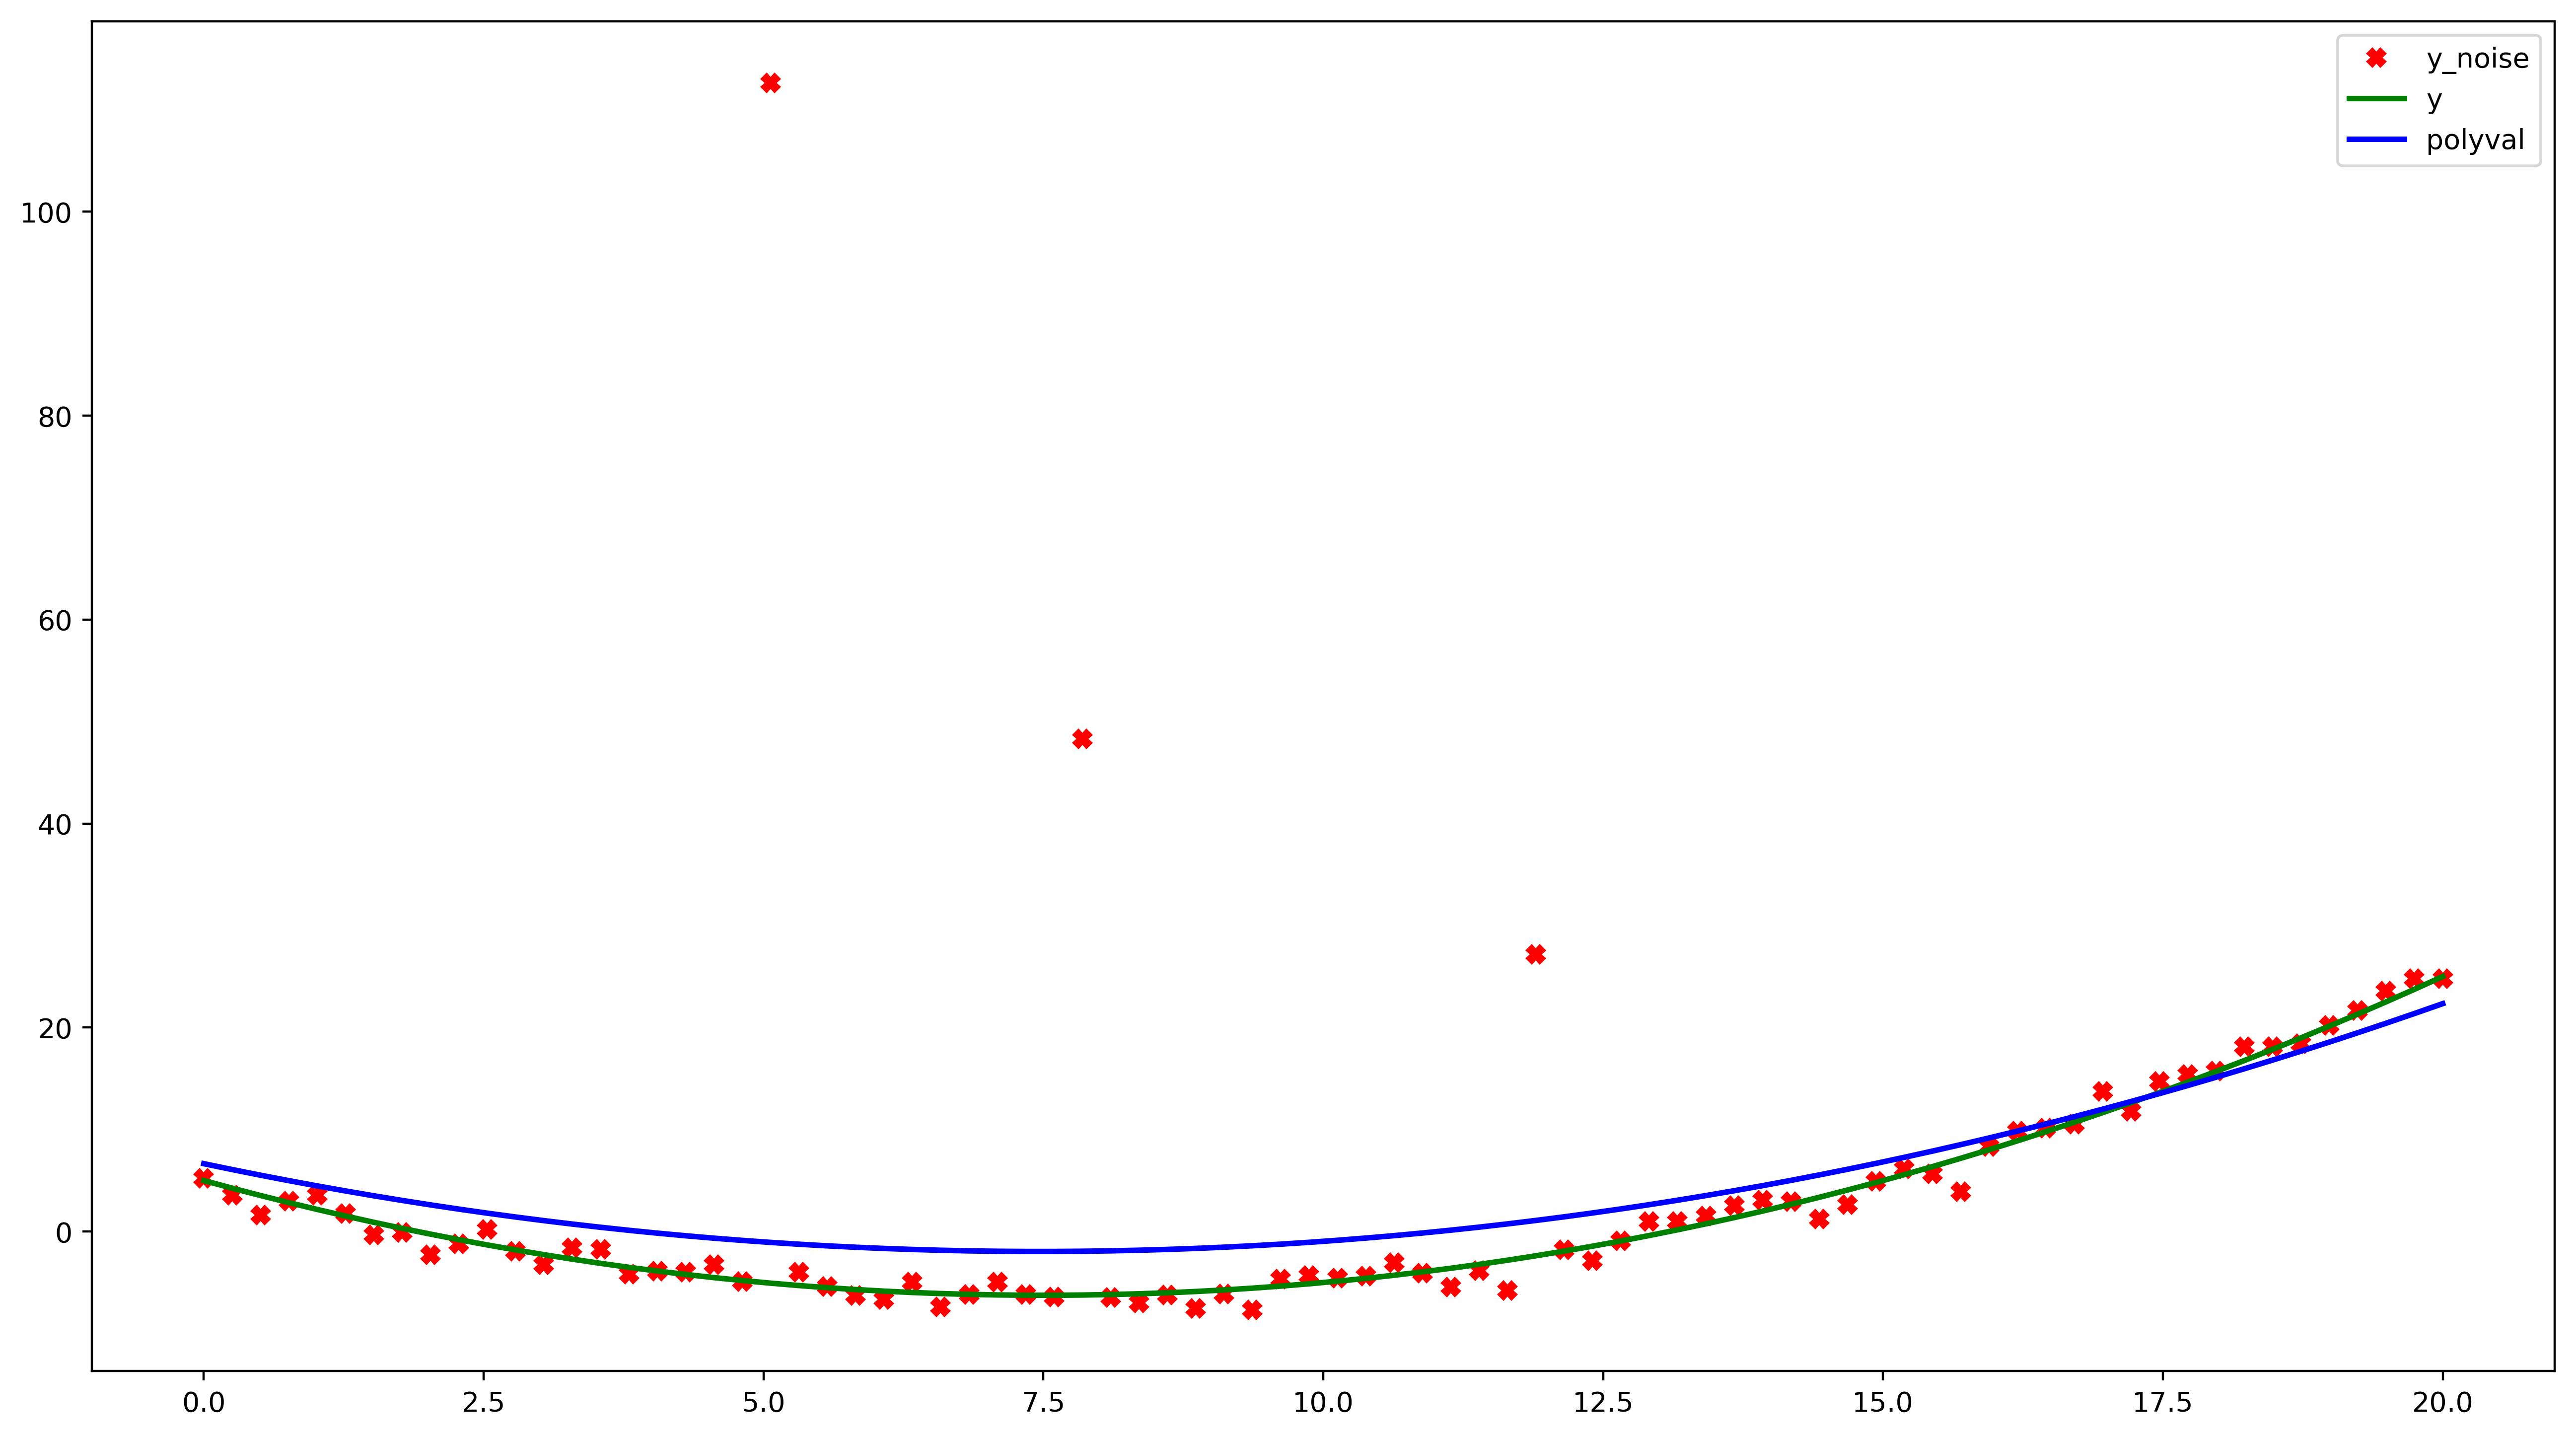

In [51]:
poly = ordinary_least_squares(x, y_noise, order=2)
polyval = np.polyval(poly, x)
print(poly)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y_noise, 'Xr', label='y_noise')
subplot.plot(x, y, color='green', lw=2, label='y')
subplot.plot(x, polyval, color='blue', lw=2, label='polyval')
plt.legend()
plt.show()

[ 0.19668467 -2.92438882  4.91172105]


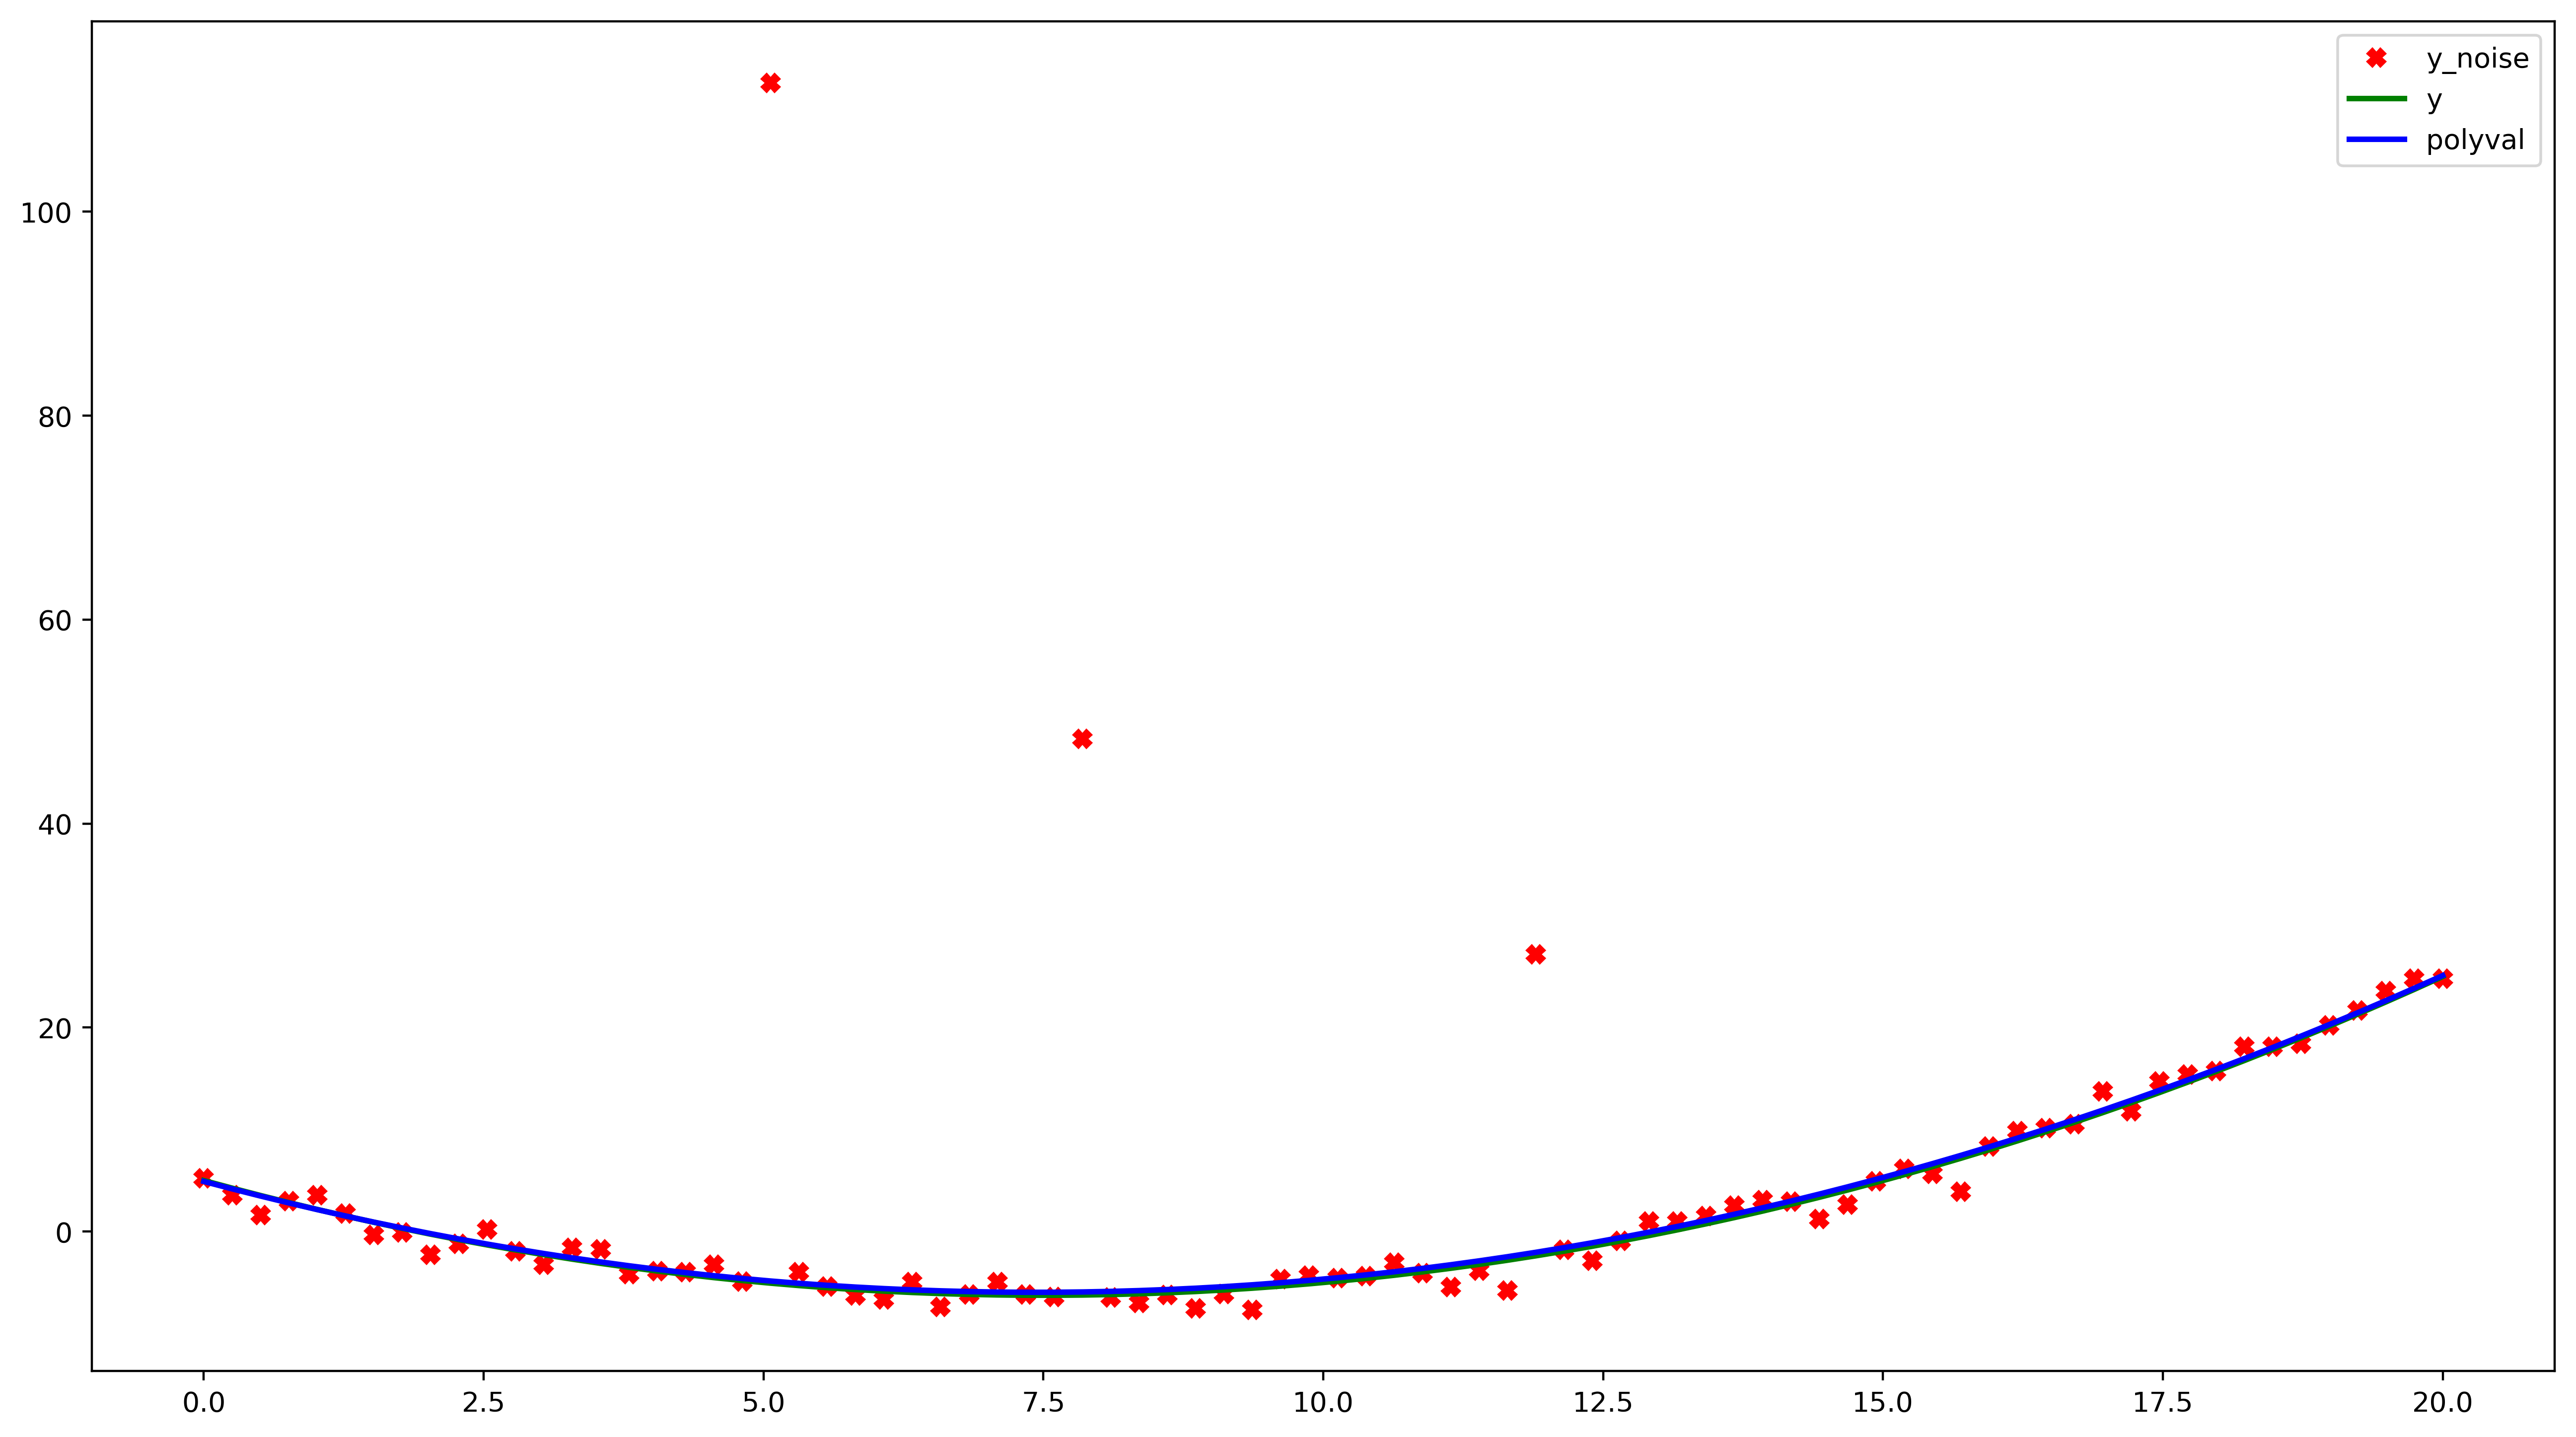

In [55]:
poly = ordinary_least_squares(x, y_noise, order=2, robust=True, delta = 5.0)
polyval = np.polyval(poly, x)
print(poly)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y_noise, 'Xr', label='y_noise')
subplot.plot(x, y, color='green', lw=2, label='y')
subplot.plot(x, polyval, color='blue', lw=2, label='polyval')
plt.legend()
plt.show()